<a href="https://colab.research.google.com/github/fchantrel/notebooks_ml/blob/main/Part_1_Statistical_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Time-series Forecasting Lab

## In this Lab you'll learn how to:
* Load and preprocess time series data
* Apply classic statistical models for future predictions
* Apply neural network architectures for supervised forecasting tasks
* Visualize and evaluate your models' results

# Part 1 - Statistical Models for forecasting

# Monthly Air Passengers (Time-Series Dataset #1)

## 1.1 Load and Visualize dataset

Firstly, do a quick installation of the following library, to use it later.

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.6 MB/s 
     |████████████████████████████████| 9.8 MB 24.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


For building classic statistical models, we will use as time-series data, the monthly air passengers dataset. It includes monthly air passengers records between 1949–1960.

In the next cell we [load the dataset in a pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), print its entries and plot its column (number of passengers per month).

We also use [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) to print the summary of statistics of the given Dataframe. Descriptive statistics summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

*Your task is after loading the dataset, to plot its column and print the summary of the statistics.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import pmdarima as pm

# Read data from csv to pandas
df=pd.read_csv("https://onedrive.live.com/download?cid=AE69638675180117&resid=AE69638675180117%2199349&authkey=AKbu0mIgDimBPTE", sep=',', parse_dates=['Month'], index_col='Month')
print('Number of rows and columns:', df.shape)
df

Number of rows and columns: (144, 1)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


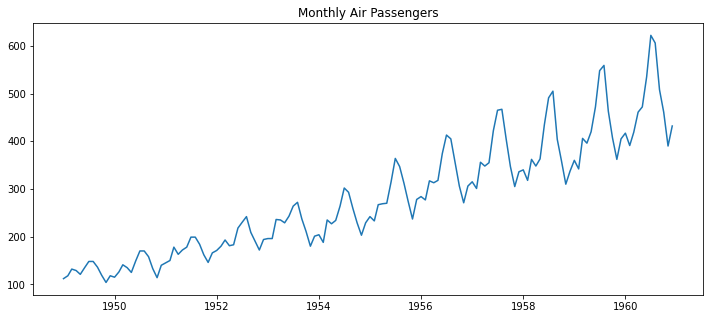

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
# Fill your code here
# Plot the #Passengers column (Monthly passengers for the years available)
plt.figure(figsize=(12,5))
plt.plot(df.loc[:,'#Passengers'])
plt.title('Monthly Air Passengers')
plt.show()

# Print statistics for the df using describe() function
df.describe()

## 1.2 Statistical analysis of the dataset

### Histogram and kde plot

Following, we will plot the histogram of the time-series. Histogram is a representation of the distribution of data. We can use the function [pandas.DataFrame.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html), which calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.

We also plot the 'kde', the probability density function of the time-series. We can use [pandas.DataFrame.plot(kind='kde')](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html) which generates Kernel Density Estimate plot using Gaussian kernels.

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.

*Your task is to calculate and plot the histogram and kde in the same plot that is already created below.*

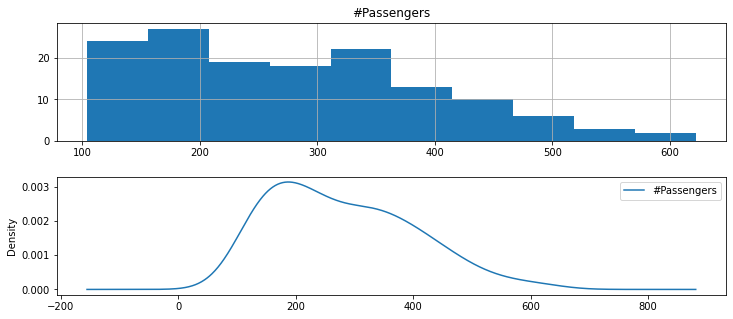

In [ ]:
# Create the figure for 2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,5))

# Fill your code here
# Create the histogram and 'kde' distributions and plot them in the above figure
df.hist(ax=ax1)
df.plot(kind='kde', ax=ax2)
plt.show()

The original plot of the time-series above indicates the presence of repeated patterns yearly. Since, we handle monthly data, intuitively we expect that there is a repeated behavior in the series each year. In the next cell we plot the monthly values of passengers per year, and since our data include 12 years (1949-1960) we obtain 12 lines.

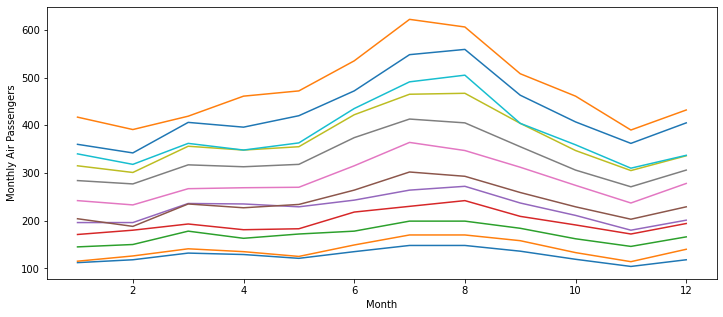

In [ ]:
# Calculate the number of passengers per month per year (1 line per year) and plot them in one figure
df['year'] = df.index.year
df['month'] = df.index.month
df_pivot = pd.pivot_table(df, values='#Passengers', index='month', columns='year')
df_pivot.plot(figsize=(12,5))
plt.legend().remove()
plt.xlabel('Month')
plt.ylabel('Monthly Air Passengers')
plt.show()

Obviously, our assumption for yearly patterns is confirmed, since the 12 lines are similar in a monthly basis. They differ in the values they show, which is explained by the existence of an upward trend in our series.

In [ ]:
df.drop(['year', 'month'], axis=1, inplace=True)

### Time-series decomposition

A series is thought to be an aggregate or combination of four components. All series have a level and noise. The trend and seasonality components are optional. It is helpful to think of the components as combining either additively or multiplicatively.

An additive model suggests that the components are added together as follows:
$y(t) = trend + cycle + seasonality + remainder$

To obtain an overview of the time-series characteristics we will use the statsmodels library to perform a time-series decomposition. The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). 

The decomposition of time series is a statistical method to deconstruct time series into its trend-cycle, seasonal and residual components.It requires that you specify whether the model is additive or multiplicative and uses moving average smoothing.

*Your task is to decompose the series and plot the result.*

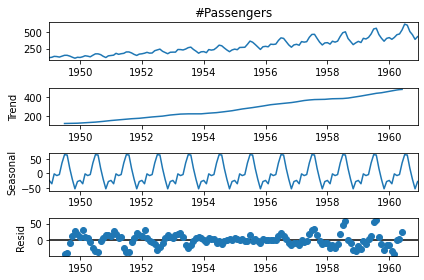

In [ ]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

# Fill your code here
# Decompose the time-series in trend, seasonality, noise components using seasonal_decompose() function
# Plot the results of decomposition
seasonal_decomposition = seasonal_decompose(df['#Passengers'], period=12, model='additive')
seasonal_decomposition.plot()
plt.show()

The decomposition plot indicates that the monthly number of air passengers has an increasing trend and also a seasonal pattern.

### Rolling Statistics

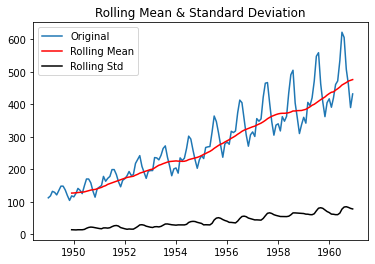

In [ ]:
# Calculate the rolling statistics using windows of length=12
# Use pandas.rolling() and calculate the mean and std of the measurements
rolling_mean = pd.Series(df['#Passengers']).rolling(window=12).mean()
rolling_std = pd.Series(df['#Passengers']).rolling(window=12).std()

# Plot the rolling statistics in a single plot
orig = plt.plot(df['#Passengers'],label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

## 1.3 Model Identification

In this step, we need to examine whether the time-series is stationary. If it is not, we have to find a transformation to make it stationary.

A time series is stationary when its statistical properties such as mean, variance, and autocorrelation are constant over time. In other words, time series is stationary when it is not dependent on time and doesn't have a trend or seasonal patterns. Most classical statistical forecasting methods are based on the assumption that time-series is stationary.

We can check stationarity by using different approaches:
- From the decomposition plot above and the calculated statistics, we noticed that the data have trend and seasonality.
- We can plot the autocorrelation and the partial autocorrelation function plots, which provide information about the dependency of time series values to their previous values.
- We can apply statistical tests for stationarity, such as the Augmented Dickey-Fuller test.

We will examine the last two approaches in the next cells.

### ACF and PACF plots
Statistical correlation summarizes the strength of the relationship between two variables.
We can assume that the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.
The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time-steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the **Autocorrelation Function**, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot. A **Partial Autocorrelation Function**, or PACF, is a summary of the relationship between an observation in a time series with observations at prior time-steps with the relationships of intervening observations removed. The autocorrelation for an observation and an observation at a prior time-step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time-steps.

If the time series is stationary, the ACF/PACF plots will show a quick cut off after a small number of lags.

We can show the autocorrelation plot of the given time-series using the [plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html) function from the statsmodels library and the partial autocorrelation plot using the [plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html) function.

*Your task is to calculate the acf and pacf and plot them in the same plot that is already created below.*

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

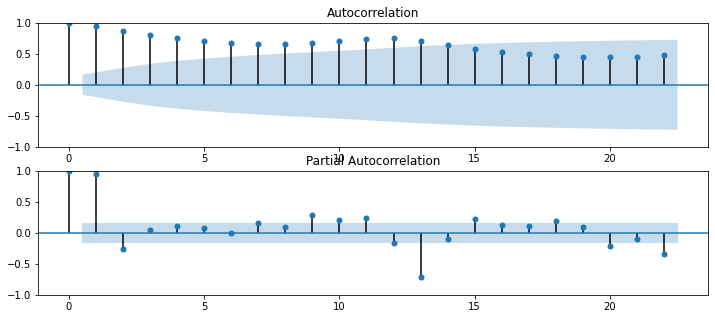

In [ ]:
# Fill your code here
# Create the figure for 2 subplots
# Use plot_acf, plot_pacf to plot ACF and PACF on the given figure
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,5))
ax1 = plot_acf(df, ax=ax1)
ax2 = plot_pacf(df, ax=ax2)
plt.show()

Here we see that both ACF and PACF plots do not show a quick cut off into the 95% confidence interval area (in blue) which means that the time-series is not stationary.

**Trend and seasonality in ACF plots:**
When data has a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also close in size. So the ACF of trended time series tends to have positive values that slowly decrease as the lags increase. When the data is seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal frequency) than for other lags. When the data is both trended and seasonal, you see a combination of these effects. The slow decrease in the ACF as the lags increase is due to the trend, while the “scalloped” shape is due to the seasonality.

### Check stationarity using Augmented Dickey-Fuller unit root test

We then apply the [Augmented Dickey-Fuller test](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) for stationarity, a unit root test for stationarity that is based on linear regression. The null hypothesis of the test is that time series has a unit root, meaning that it is non-stationary. 

A common example of a non-stationary series is the random walk:
$$y_t = y_{t-1} + \epsilon_t$$

where $e_t$ is a stationary random disturbance term. The series  has a forecast value, conditional on $t$, and the variance is increasing over time. The random walk is a difference stationary series since the first difference of $y$ is stationary:
$$y_t - y_{t-1} = \epsilon_t$$ 

A differenced stationary series is said to be integrated and is denoted as I(1) where 1 is the order of integration. The order of integration is the number of unit roots contained in the series, or the number of differencing operations it takes to make the series stationary. For the random walk above, there is one unit root, so it is an I(1) series. Similarly, a stationary series is I(0).

Standard inference procedures do not apply to regressions which contain an integrated dependent variable or integrated regressors. Therefore, it is important to check whether a series is stationary or not before using it in a regression. The formal method to test the stationarity of a series is the unit root test.

**Unit Root Test**

Consider a simple AR(1) process:
$$y_t = \rho y_{t-1} + \epsilon_t \tag{1}$$
- If $\lvert\rho\rvert \geq1$, $y$ is a non-stationary series and the variance of $y$ increases with time and approaches infinity.
- If $\lvert\rho\rvert<1$, $y$ is a stationary series. Thus, the hypothesis of stationarity can be evaluated by testing whether the absolute value of $\rho$ is strictly less than one.

The null and alternative hypotheses of the unit root test may be written as:
$$H_0: \rho=1$$
$$H_1: \rho<1$$

**Standard Dickey-Fuller (DF) test**

The standard DF test is carried out by estimating Equation(1) after subtracting $y_{t-1}$ from both sides of the equation:
$$\Delta y_t = \alpha y_{t-1} + \epsilon_t$$

where $\alpha=\rho-1$
The null and alternative hypotheses may be written as:
$$H_0: \alpha=0$$
$$H_1: \alpha<0 \tag{2}$$ 

This test can be evaluated by calculating an estimation for $\alpha$, denoted as $\hat{\alpha}$. If $se(\hat{a})$ is the standard coefficient error, then the evaluation can be done using the conventional $t$-ratio: $$t_\alpha=\frac{\hat{\alpha}}{se(\hat{a})} \tag{3}$$

Dickey and Fuller (1979) show that under the null hypothesis of a unit root, this statistic does not follow the conventional Student’s t-distribution, and they derive asymptotic results and simulate critical values for various test and sample sizes. 

**Augmented Dickey-Fuller (ADF) test**

The simple Dickey-Fuller unit root test described above is valid only if the series is an AR(1) process. If the series is correlated at higher order lags, the assumption of white noise disturbances $\epsilon_t$ is violated. The Augmented Dickey-Fuller (ADF) test constructs a parametric correction for higher-order correlation by assuming that the series $y$ follows an AR(p) process and adding $p$ lagged difference terms of the dependent variable $y$ to the right-hand side of the test regression:

$$\Delta y_t = \alpha y_{t-1}+\beta_1\Delta y_{t-1}+\beta_2\Delta y_{t-2}+...+\beta_p\Delta y_{t-p}+\epsilon_t$$ 

This augmented specification is then used to test Equation(2) using the $t$-ratio Equation(3). An important result obtained by Fuller is that the asymptotic distribution of the $t$-ratio for $\alpha$ is independent of the number of lagged first differences included in the ADF regression. 

**In practice**

We interpret the test result using the p-value of the test or the test statistic equivalently. If the p-value is lower than the significance level of 0.05 and the ADF statistic is lower than the critical values (5% or 1%), we reject the null hypothesis and the time series is stationary. If the p-value is higher than the threshold, we fail to reject the null hypothesis and the time series is non-stationary.

An optional argument, the adfuller() accepts, is the number of lags you want to consider while performing the OLS regression. By default, this value is $12*(nobs/100)^{1/4}$, where nobs is the number of observations in the series. But, optionally, you can specify either the maximum number of lags with the maxlag parameter or let the algorithm compute the optimal number iteratively. This can be done by setting the autolag='AIC'. By doing so, the adfuller will choose the number of lags that yields the lowest AIC. 

The AIC (Akaike Information Criterion) is an estimator of the out-of-sample prediction error and thereby of the relative quality of statistical models for the given set of data. For $k$ estimated parameters and $\hat{L}$  the maximum value of the likelihood function for the model:
$$AIC=2k-2ln{\hat{L}}$$
AIC rewards goodness of fit (as assessed by the likelihood function), but it also includes a penalty that is an increasing function of the number of estimated parameters.


In [ ]:
from statsmodels.tsa.stattools import adfuller

# This function calls the adfuller() function which returns a number of statistics that we print below
def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))
        
print ('Results of Dickey-Fuller Test:')

# Call the check_stationarity() function to print the results of the ADF test
check_stationarity(df['#Passengers'])

Results of Dickey-Fuller Test:
The test statistic: 0.815369
p-value: 0.991880
Critical Values:
1%: -3.482
5%: -2.884
10%: -2.579


We notice that the p-value is greater than the threshold value, so we fail to reject the null hypothesis and as a result, the time-series is non-stationary.

### Transform the time-series to stationary

There are two main parts for non-stationary time-series, trend and seasonality. We can apply differencing to make the time series stationary by subtracting the value of the previous observation from the current. Since the time-series has both trend and seasonal components, we apply one non-seasonal differencing (between observations in t, t-1) and one seasonal differencing (between observations in t, t-12). 

We can easily create a new dataframe from the existing df, using pandas.DataFrame.diff() function for differencing all the elements.

*Your task is to difference the time-series once for trend and once for seasonality.*

In [ ]:
# Fill your code here
# We use pandas.diff() function to calculate the differenced series 
# First for periods=1 (x(t)=y(t)-y(t-1)) and then for periods=12 (x(t)-x(t-12))
df_diff = df.diff().diff(12)

# Some NaN values are created that we need to remove using pandas.dropna()
print(df_diff)
df_diff.dropna(inplace=True)
print(df_diff.shape)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01        -27.0
1960-09-01         -2.0
1960-10-01          9.0
1960-11-01        -26.0
1960-12-01         -1.0

[144 rows x 1 columns]
(131, 1)


### Plot PACF/ACF and run the ADF test after the transformation
We repeat the tests for stationarity for the transformed time-series.
For the differenced time series (1 differencing for trend and 1 for seasonality) we proceed by plotting its values, the ACF and PACF and the results of the ADF test. 

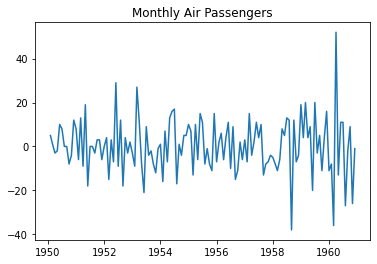

In [ ]:
# Plot the differenced time series 
plt.plot(df_diff['#Passengers'])
plt.title('Monthly Air Passengers')
plt.show()

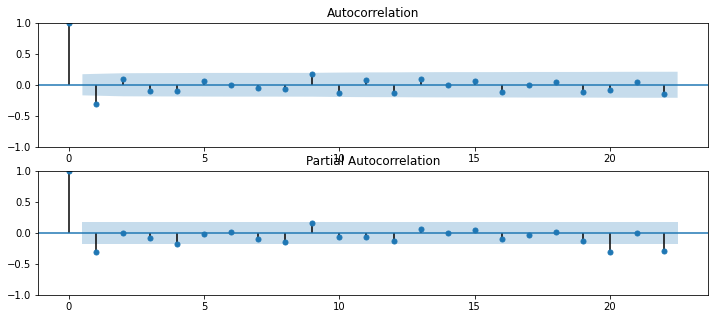

In [ ]:
# We plot ACF, PACF for the differenced time-series
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,5))
ax1 = plot_acf(df_diff, ax=ax1)
ax2 = plot_pacf(df_diff, ax=ax2)
plt.show()

In [ ]:
# We apply the ADF test on the differenced time-series using the check_stationarity() function
print ('Results of Dickey-Fuller Test:')
check_stationarity(df_diff['#Passengers'])

Results of Dickey-Fuller Test:
The test statistic: -15.595618
p-value: 0.000000
Critical Values:
1%: -3.482
5%: -2.884
10%: -2.579


After running the stationarity tests again, we notice that the plot of the differenced time-series, does not show any specific trend or seasonal patterns, ACF/PACF plots have a quick cut-off, and the ADF test result returns p-value = 0.00 which is lower than the threshold. So we have confirmed that the transformed data is stationary.

### Split the dataset in train, test
We divide our dataset into train and test sets in order to fit the model in the train set and evalute its performance on the test set. This split should be done with respect to the order of time-steps and with no overlapping, since we are working with time-series data.The train set will be used to find the optimal parameters for our statistical models. The test set (unseen data) will be used for the evaluation of our model.

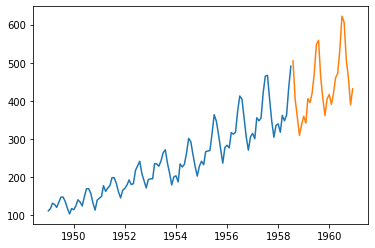

In [ ]:
# First we divide the data into train and test set
# We use 80% for training and the rest for testing
train = df[:int(0.8*(len(df)))]
test = df[int(0.8*(len(df))):]

# We plot train and test data in the same plot
plt.figure()
plt.plot(train['#Passengers'])
plt.plot(test['#Passengers'])
plt.show()

### Model Parameter Estimation

After the statistical analysis, we will use the Seasonal Autoregressive Integrated Moving Average (SARIMA or Seasonal-ARIMA) for time-series forecasting. It is an extension of ARIMA that supports time series data with a seasonal component.

ARIMA stands for **Autoregressive Integrated Moving Average** and is one of the most common techniques of classical time series forecasting methods. ARIMA models are denoted with the order of ARIMA(p,d,q). A reminder on ARIMA equation:

The backshift operator $$B(X_t)=X_{t-1}, B^2(X_t)=X_{t-2},...,etc$$

Let $Y_t = \nabla^d{X_t} = (1-B)^d{X_t}$, based on the degree of differencing I($d$) then for $p$,$q$ parameters:

$$X_t = \phi_1X_{t-1}+\phi_2X_{t-2}+...+\phi_pX_{t-p}+W_t+\theta_1W_{t-1}+\theta_2W_{t-2}\theta_qW_{t-q} \tag{1}$$
$$\Rightarrow \phi_p(B)X_t = \theta_q(B)W_t$$
where $$\phi_p(B) = 1-\phi_1B-\phi_2B^2-...-\phi_pB^p \tag{1.a}$$
$$\theta_q(B) = 1+\theta_1B+\theta_2B^2+...+\theta_qB^q \tag{1.b}$$

SARIMA models are denoted with the order of SARIMA(p, d, q)(P, D, Q)[m].
- **AR(p)** is a regression model that utilizes the dependent relationship between an observation and some number of lagged observations.
- **I(d)** is the differencing order to make the time series stationary.
- **MA(q)** is a model that uses the dependency between an observation and a residual error applied to lagged observations.

**(P, D, Q)[m]** are the additional set of parameters that specifically describe the seasonal components of the model. P, D, and Q represent the seasonal regression, differencing, and moving average coefficients respectively, and m represents the number of data points in each seasonal cycle. Alternatively, we can explain the length of the cycle, as the number of periods necessary to pass before the tendency reappears. If we want to inspect a seasonal trend, we need to make sure to set the appropriate cycle length. 

**SARIMA(p, d, q)(P, D, Q)[m]** has the form:
$$\phi_p(B)\Phi_P(B^m)(1-B)^d(1-B^m)^DX_t = \theta_q(B)\Theta_Q(B^m)W_t \tag{2}$$
where $$\Phi_P(B^m) = 1-\Phi_1B^m-\Phi_2B^{2m}-...-\Phi_pB^{Pm} \tag{2.a}$$
$$\Theta_Q(B^m) = 1+\Theta_1B^m+\Theta_2B^{2m}+...+\Theta_qB^{Qm} \tag{2.b}$$

We will use pmdarima library, to automatically calculate the best parameters for the Seasonal ARIMA model. 

We call the [pmdarima.auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html) function, where we specify:
- d=1 and D=1 in order to calculate the differencing, once for the trend and once for the seasonality.
- m=12, since we have monthly data.
- trend='C', to include a constant.
- seasonal=True, to fit a seasonal-ARIMA.
- trace=True, to print information on the fits.
- start_p = start_q = 0, the initial values for p,q.
- max_order = 6, the maximum sum of p,q,P,Q parameters in each combination.
- stepwise = True, to use the stepwise algorithm outlined in Hyndman and Khandakar (2008) to identify the optimal model parameters. The stepwise algorithm can be significantly faster than fitting all hyper-parameter combinations and is less likely to over-fit the model.
- test='adf', the type of unit root test to use in order to detect stationarity.

The output for each combination helps us to determine the best parameters based on the minimum AIC score.

*Your task is to call pm.auto_arima with the above mentioned parameters, to evaluate different models on the train series.*

In [ ]:
warnings.filterwarnings('ignore')

# Fill your code here
# We call pm.auto_arima with the above mentioned parameters
# This function returns the best models and show the results of fit for the different combinations of parameters
model = pm.auto_arima(train['#Passengers'], d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=1, start_q=1, max_order=6, 
                      test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=760.181, Time=1.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=759.772, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=757.666, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=758.296, Time=0.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=757.438, Time=0.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=757.897, Time=0.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=759.568, Time=0.41 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=758.709, Time=0.17 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=757.961, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=757.951, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=759.915, Time=0.29 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12] intercept
Total fit time: 3.452 seconds


The results of auto_arima function indicate the combination of parameters that gives the lowest AIC score.

## 1.4 Forecasting - Model Evaluation 
We fit Seasonal ARIMA (SARIMAX) using the [SARIMAX function](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html), with the chosen parameters on our train set and print the summary of the model.

*Your task is to fit SARIMAX with the selected parameters and print its summary.*

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fill your code here
# Call SARIMAX function with the selected values for the parameters p,d,q,P,D,Q,m
model = SARIMAX(train['#Passengers'],order=(1,1,0),seasonal_order=(0,1,0,12))
SARIMAX_results = model.fit()

# Print the summary of training
SARIMAX_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -375.750
Date:                            Tue, 30 Nov 2021   AIC                            755.499
Time:                                    14:26:40   BIC                            760.749
Sample:                                01-01-1949   HQIC                           757.625
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2048      0.090     -2.271      0.023      -0.382      -0.028
sigma2        92.6974     13.326      6.956      0.000      66.579     118.816
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.44
Prob(Q):                              0.87   Prob(JB):                         0.30
Heteroskedasticity (H):               0.96   Skew:                             0.37
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

For the fitted model we want to ensure that the residuals are normally distributed with zero mean and that they are uncorrelated.

To see the residuals statistics, we can print the model's diagnostics with [SARIMAXResults.plot_diagnostics](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.plot_diagnostics.html). This function produces a 2x2 plot grid with the following plots (ordered clockwise from top left):
- Standardized residuals over time
- Histogram plus the estimated density of standardized residuals, along with a Normal(0,1) density plotted for reference.
- Normal Q-Q plot, with Normal reference line (graphical method for comparing two probability distributions by plotting their quantiles against each other)
- Correlogram

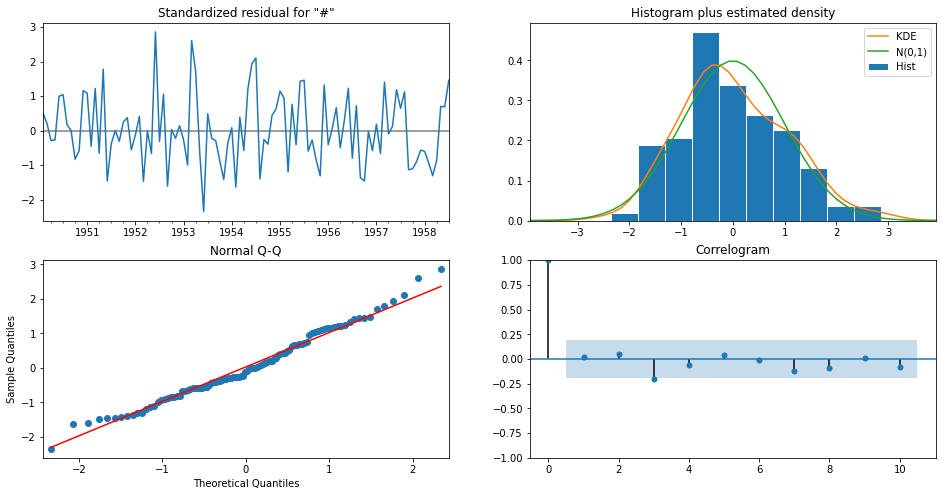

In [ ]:
SARIMAX_results.plot_diagnostics(figsize=(16, 8))
plt.show()

Residual indeed is the difference between true and predicted value. If there are correlations between residuals - there is information left in the residuals which should be used in computing forecasts. If the residuals have a mean other than zero, then the forecasts are biased. 
- The top left plot which shows the residuals over time, appears to be a white noise with no seasonal component. A good fit shows that there are no obvious patterns in the residuals.
- The top right plot shows that the kde line is close to the $N(0,1)$, which is the standard notation of normal distribution with zero mean and standard deviation of 1. This means that the residuals are normally distributed. 
- The bottom left plot shows that the ordered distribution of residuals is close to the linear trend of the samples taken from a standard normal distribution, which also suggests that the residuals are normally distributed. For a good fit most of the data points should lie on the straight line.
- The bottom right, that is a correlogram plot indicates that the residuals have a low correlation with the lagged versions. In a good fit, 95% of correlations for lag greater than one, should not be significant, so the residuals are white noise.

### Get forecasts for test set
We then call [get_forecasts](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_forecast.html) function on SARIMAX model, which returns prediction results, an instance containing in-sample predictions and out-of-sample forecasts. We have to define the parameter steps as the number of steps to forecast from the end of the sample.

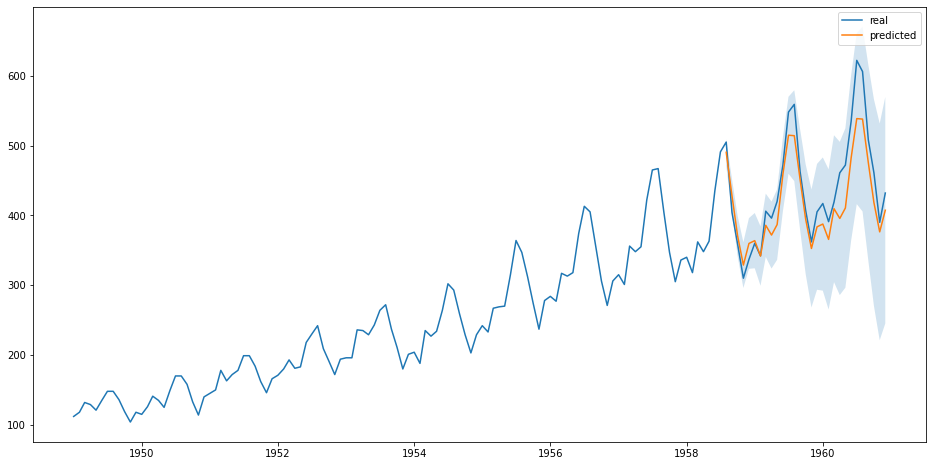

In [ ]:
prediction_object = SARIMAX_results.get_forecast(steps=len(test))
plt.figure(figsize=(16,8))

# Plot real values of monthly Air passengers
plt.plot(df.index, df, label='real')

# Plot the prediction means
plt.plot(prediction_object.predicted_mean.index, prediction_object.predicted_mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(prediction_object.predicted_mean.index, prediction_object.conf_int().iloc[:,0],  prediction_object.conf_int().iloc[:,1],
alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

Following, we use the [predict function](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.predict.html) to print  the forecasts in an alternative way (we need to define the start and end points for predictions).

In [ ]:
# Call the predict function for test
start=len(train)
end=len(train)+len(test)-1
predictions = SARIMAX_results.predict(start=start, end=end).rename('SARIMA(1,1,0)(0,1,0,12) Predictions')

# Compare predictions to the real values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]}, real={test['#Passengers'][i]}")

predicted=490.3379107574006, real=505
predicted=427.8830429986005, real=404
predicted=370.77141294667, real=359
predicted=328.79427211285423, real=310
predicted=359.7895911020547, real=337
predicted=363.7905496611696, real=360
predicted=341.7903533711767, real=342
predicted=385.790393566675, real=406
predicted=371.79038533559776, real=396
predicted=386.7903870211257, real=420
predicted=458.7903866759697, real=472
predicted=514.7903867466495, real=548
predicted=514.1282974895765, real=559
predicted=451.6734297337402, real=463
predicted=394.56179968120284, real=407
predicted=352.5846588475114, real=362
predicted=383.5799778366864, real=405
predicted=387.58093639580653, real=417
predicted=365.5807401058125, real=391
predicted=409.58078030131105, real=419
predicted=395.58077207023376, real=461
predicted=410.5807737557617, real=472
predicted=482.58077341060584, real=535
predicted=538.5807734812855, real=622
predicted=537.9186842242126, real=606
predicted=475.4638164683763, real=508
predicte

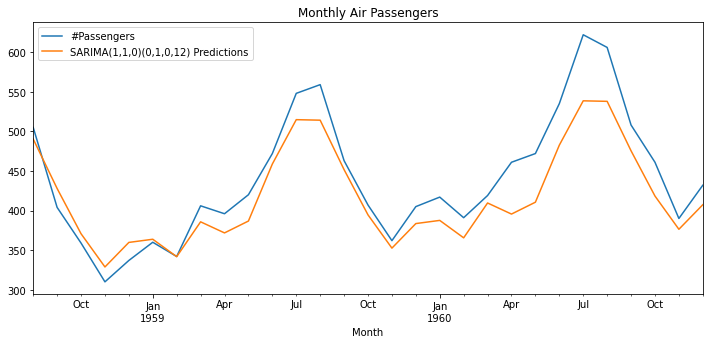

In [ ]:
# Plot predictions against known values
ax = test['#Passengers'].plot(legend=True,figsize=(12,5),title='Monthly Air Passengers')
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

Since we have made our predictions on the test set we can calculate some evaluation metrics on the regression model. We print the r2_score, the mean_absolute_error and the mean_squared_error.

- **r2_score** is defined as: $R^2 = 1- \frac{\sum_{i=1}^{n}(x_i-y_i)^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$, where $y_i$ is the prediction and $x_i$ is the true value. The r2_score function computes the coefficient of determination, usually denoted as R². It represents the proportion of variance (of x) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. A higher value of $R^2$ is desirable as it indicates better results.
- **mean_absolute_error (MAE)** is defined as: the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. $MAE = \frac{1}{n}\sum_{i=1}^{n}\lvert{y_i-x_i}\rvert$, where $y_i$ is the prediction and $x_i$ is the true value.
- **mean_squared_error (MSE)** is defined as:  the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. $MSE = \frac{1}{n}\sum_{i=1}^{n}({y_i-x_i})^2$, where $y_i$ is the prediction and $x_i$ is the true value.
- **mean_absolute_percentage_error (MAPE)** is defined as: a measure of prediction for forecasting which expresses the accuracy as a ratio defined by the formula $MAPE = \frac{1}{n}\sum_{i=1}^{n}\lvert{\frac{x_i-y_i}{x_i}}\rvert$, where $y_i$ is the prediction and $x_i$ is the true value. The MAPE is also sometimes reported as a percentage, which is the above equation multiplied by 100.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

evaluation_metrics = pd.DataFrame({'r2_score': r2_score(test['#Passengers'], predictions)}, index=[0])
evaluation_metrics['mean_absolute_error'] = mean_absolute_error(test['#Passengers'], predictions)
evaluation_metrics['mean_squared_error'] = mean_squared_error(test['#Passengers'], predictions)
evaluation_metrics['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['#Passengers'])/np.abs(test['#Passengers']))*100 

evaluation_metrics

,r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
0,0.798377,28.547409,1230.803774,6.12455


### Our Conclusions on statistical models for forecasting:
- Statistical Models remain throughout the years very effective in time-series forecasting
- However, understanding their mechanisms requires a strong mathematical background
- They also require feature engineering and an intuition about the time-series properties and patterns
- Forecasting becomes very slow and complex for big time-series
- They are also more compatible with univariate time-series and can be used in 1-step ahead forecasting